# Diferencias finitas: cálculo del error
**Objetivo general**
- Implementar varias fórmulas de aproximación de la primera derivada y compararlas entre ellas mediante el cálculo del error.

**Objetivos particulares**
- Revisar las fórmulas de aproximación de la primera derivada: Forward, Backward, Central.
- Implementar funciones para calcular las fórmulas.
- Calcular el error que introducen estas fórmulas.
- Mostrar de manera gráfica el error.
- Implementar funciones de varios órdenes para compararlas con las fórmulas anteriores.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Analisis_Numerico_01">MACTI-Analisis_Numerico_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101922**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import macti.visual as mvis
from macti.evaluation import *

In [18]:
quizz = Quizz("q3", "notebooks", "local")

<a name='1'></a>
## Introducción

La siguiente herramienta tiene como propósito mostras diferentes funciones y sus derivadas exactas así como el cálculo numérico de las derivadas usando varias aproximaciones. Puedes elegir la función y el tipo de aproximación. Después, puedes mover el punto donde se realiza la aproximación (punto azul) y el tamaño de la $h$.

In [2]:
%run "./zinteractivo3.ipynb"

interactive(children=(Dropdown(description='Función', options=(cos(x), sin(x), exp(x), exp(x)*cos(x), tan(x), …

<function FD.numericalDer(f, x0, h, aprox='All')>

<a name='2'></a>
## Diferencias finitas hacia adelante (Forward).

$
\displaystyle
\dfrac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x)}{h}
$

La siguiente función de Python implementa la aproximación de **diferencias finitas hacia adelante**.

In [3]:
def forwardFD(u,x,h):
    """ 
    Esquema de diferencias finitas hacia adelante.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica hacia adelante.
    """
    return (u(x+h)-u(x))/h

<div class="alert alert-info">

## Ejemplo 1.

<font color="Black">

La derivada de $\sin(x)$ es $\dfrac{d \sin(x)}{d x} = \cos(x)$. Si evaluamos la derivada en $x=1$ obtenemos: $\cos(1.0) = 0.5403023058681398$.

Vamos a aproximar este valor usando diferencias finitas hacia adelante con la función `forwardFD()`. Dado que esta aproximación será mejor cuando $h \to 0$, usaremos el siguiente conjunto de valores $h$ para hacer varias aproximaciones: 

$$
\begin{eqnarray*}
H & = & \{h|h = \frac{1}{2^i} \; \text{para} \; i = 1,\dots,5 \} \\
  & = & \{1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125 \}
\end{eqnarray*}
$$  

</font>

</div>

In [6]:
# Definimos un arreglo con diferentes tamaños de h:
N = 6
h = np.array([1 / 2**i for i in range(0,N)])

# Definimos un arreglo con valores de 1.0 (donde evaluaremos el cos(x)):
x = np.ones(N)

print('h = {}'.format(h))
print('x = {}'.format(x))

h = [1.      0.5     0.25    0.125   0.0625  0.03125]
x = [1. 1. 1. 1. 1. 1.]


Ahora usamos la función `forwardFD()` para aproximar la derivada de la función $\sin(x=1.0)$:

In [9]:
forwardFD(np.sin, x, h)

array([0.06782644, 0.312048  , 0.43005454, 0.48637287, 0.51366321,
       0.52706746])

El **error absoluto** entre la derivada exacta y la aproximación se puede calcular usando la fórmula:

$$
Error = || \cos(x) - D_+ \sin(x)||
$$

donde $D_+$ representa la aplicación de la fórmula hacia adelante. Recuerda que la derivada de $\sin(x)$ es $\cos(x)$.

In [10]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
ef = np.fabs(np.cos(x) - forwardFD(np.sin, x, h) )
print(ef)

[0.47247586 0.2282543  0.11024777 0.05392943 0.0266391  0.01323485]


In [28]:
# Colocamos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h, ef]).T, 
                     columns=['$h$','$D_+$'])
Error

,$h$,$D_+$
0,1.00000,0.472476
1,0.50000,0.228254
2,0.25000,0.110248
3,0.12500,0.053929
4,0.06250,0.026639
5,0.03125,0.013235


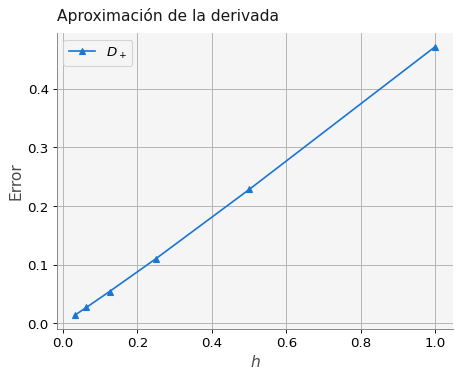

In [13]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.grid()
plt.show()

<a name='3'></a>
## Diferencias finitas hacia atrás (Backward).

$
\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x) - u(x-h)}{h}
$

La siguiente función de Python implementa la aproximación de **diferencias finitas hacia atrás**.

In [15]:
def backwardFD(u,x,h):
    """ 
    Esquema de diferencias finitas hacia atrás.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica hacia atrás.
    """
    return (u(x)-u(x-h))/h

<div class="alert alert-success">

## Ejercicio 1.

<font color="Black">

Tomando como base el ejemplo de diferencias finitas hacia adelante, calcula el error entre la derivada exacta y la aproximación con diferencias finitas hacia atrás usando la fórmula:

$$
Error = || \cos(x) - D_- \sin(x)||
$$

donde $D_-$ representa la aplicación de la fórmula hacia atrás.

</font>

</div>

In [16]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
### BEGIN SOLUTION
eb = np.fabs( np.cos(x) - backwardFD(np.sin,x,h) )
file_answer = FileAnswer()
file_answer.write('1', eb, 'La implementación del error no es correcta, checa también los valores que estás comparando.')
### END SOLUTION

print(eb)

Creando el directorio :/home/jovyan/macti_notes/notebooks/.ans/DerivadasNumericas/
Respuestas y retroalimentación almacenadas.
[0.30116868 0.18378859 0.09902659 0.05111755 0.02593572 0.01305898]


In [19]:
quizz.eval_numeric('1', eb)

----------------------------------------
1 | Tu resultado es correcto.
----------------------------------------


In [31]:
# Agregamos la columna del error de diferencias finitas hacia atrás
Error['$D_-$'] = eb
Error

,$h$,$D_+$,$D_-$
0,1.00000,0.472476,0.301169
1,0.50000,0.228254,0.183789
2,0.25000,0.110248,0.099027
3,0.12500,0.053929,0.051118
4,0.06250,0.026639,0.025936
5,0.03125,0.013235,0.013059


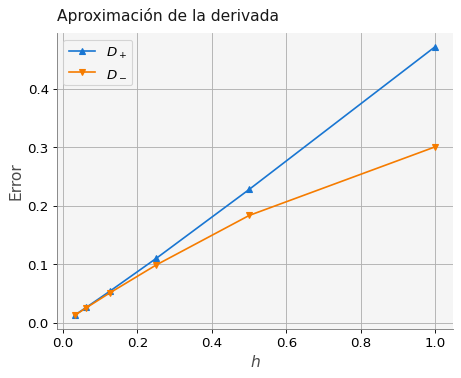

In [21]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.grid()
plt.show()

<a name='4'></a>
## Diferencias finitas centradas.

$
\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x-h)}{2h}
$

La siguiente función de Python implementa la aproximación de **diferencias finitas centradás**.

In [22]:
def centeredFD(u,x,h):
    """ 
    Esquema de diferencias finitas centradas.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica centrada.
    """
    return (u(x+h)-u(x-h))/(2*h)

<div class="alert alert-success">

## Ejercicio 2.

<font color="Black">

Tomando como base el ejercicio 1, calcula el error entre la derivada exacta y la aproximación con diferencias finitas centradas usando la fórmula:

$$
Error = || \cos(x) - D_0 \sin(x)||
$$

donde $D_0$ representa la aplicación de la fórmula de diferencias centradas.

</font>

</div>

In [23]:
# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
### BEGIN SOLUTION
# Calculamos el error entre la derivada exacta y la derivada numérica:
ec = np.fabs( np.cos(x) - centeredFD(np.sin,x,h) )

file_answer.write('2', ec, 'La implementación del error no es correcta, checa también los valores que estás comparando.')
### END SOLUTION

print(ec)

El directorio :/home/jovyan/macti_notes/notebooks/.ans/DerivadasNumericas/ ya existe
Respuestas y retroalimentación almacenadas.
[8.56535925e-02 2.22328579e-02 5.61058720e-03 1.40593842e-03
 3.51690617e-04 8.79355346e-05]


In [24]:
quizz.eval_numeric('2', ec)

----------------------------------------
2 | Tu resultado es correcto.
----------------------------------------


<div class="alert alert-success">

## Ejercicio 3.

<font color="Black">

Tomando como base los ejemplos de diferencias finitas hacia adelante y hacia atrás, agrega una columna con 
los resultados del error de la aproximación de diferencias centradas en el DataFrame `Error`.
</font>

</div>

In [33]:
# Agregamos la columna del error de diferencias finitas centradas
# Error['...'] = ...

### BEGIN SOLUTION
Error['$D_0$'] = ec
Error
### END SOLUTION
Error

,$h$,$D_+$,$D_-$,$D_0$
0,1.00000,0.472476,0.301169,0.085654
1,0.50000,0.228254,0.183789,0.022233
2,0.25000,0.110248,0.099027,0.005611
3,0.12500,0.053929,0.051118,0.001406
4,0.06250,0.026639,0.025936,0.000352
5,0.03125,0.013235,0.013059,0.000088


Observe que en este caso los errores son varios órdenes de magnitud más pequeños. Para hacer una gráfica más representativa usaremos escala `loglog`:

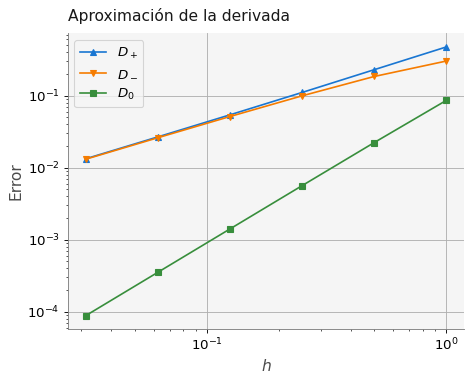

In [34]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.grid()
plt.loglog()  # Definimos la escala log-log
plt.show()

Como se puede apreciar, la gráfica anterior muestra que la aproximación con diferencias finitas centradas es mejor, pues es de orden cuadrático.

<div class="alert alert-success">

## Ejercicio 4. Aproximación con cuatro puntos

<font color="Black">

Implementar a siguiente fórmula de aproximación para el cálculo de la primera derivada y usarla 
para calcular la derivada del $\sin(x)$ en $x=1.0$ y compararla con las anteriores calculando el error y graficando.

$$
D_3 u = \dfrac{1}{6 h} 
\left[ 2u_{i+1} + 3u_{i} - 6u_{i-1} + u_{i-2} \right]
$$

**Hint**: Recuerde que $u_i = u(x)$, $u_{i+1} = u(x+h)$, $u_{i-1} = u(x-h)$ y $u_{i-2} = u(x-2h)$.

</font>

</div>

In [35]:
# Implementación de D3
def D3(u,x,h):
    ### BEGIN SOLUTION
    return (2*u(x+h)+3*u(x)-6*u(x-h)+u(x-2*h)) / (6*h)
    ### END SOLUTION

In [36]:
### BEGIN SOLUTION
# Calculamos el error entre la derivada exacta y la derivada numérica:
e3 = np.fabs( np.cos(x) - D3(np.sin,x,h) )

file_answer.write('3', e3, 'La implementación del error no es correcta, checa también los valores que estás comparando.')
### END SOLUTION

print(e3)

El directorio :/home/jovyan/macti_notes/notebooks/.ans/DerivadasNumericas/ ya existe
Respuestas y retroalimentación almacenadas.
[4.32871647e-02 7.31425947e-03 1.01447520e-03 1.32213104e-04
 1.68339444e-05 2.12244935e-06]


In [37]:
quizz.eval_numeric('3', e3)

----------------------------------------
3 | Tu resultado es correcto.
----------------------------------------


<div class="alert alert-success">

## Ejercicio 5.

<font color="Black">

Tomando como base los ejemplos de diferencias finitas anteriores, agrega una columna con 
los resultados del error de la aproximación de diferencias con cuatro puntos en el DataFrame `Error`.
</font>

</div>

In [39]:
# Agregamos la columna del error de diferencias finitas centradas
### BEGIN SOLUTION
Error['$D_3$'] = e3

### END SOLUTION
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$
0,1.00000,0.472476,0.301169,0.085654,0.043287
1,0.50000,0.228254,0.183789,0.022233,0.007314
2,0.25000,0.110248,0.099027,0.005611,0.001014
3,0.12500,0.053929,0.051118,0.001406,0.000132
4,0.06250,0.026639,0.025936,0.000352,0.000017
5,0.03125,0.013235,0.013059,0.000088,0.000002


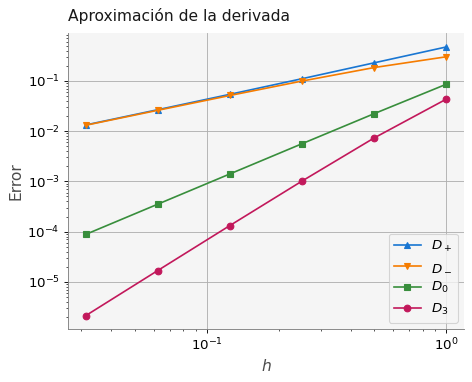

In [40]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h, e3, 'o-', label='$D_3$')

plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.grid()
plt.show()

<div class="alert alert-success">

## Ejercicio 6. Aproximación con tres puntos (left).

<font color="Black">

Implementar a siguiente fórmula de aproximación para el cálculo de la primera derivada y usarla 
para calcular la derivada del $\sin(x)$ en $x=1.0$ y compararla con las anteriores.

$$
D_{2l}f^\prime = \frac{3 f_i - 4 f_{i-1} + f_{i-2}}{2h}
$$
</font>

</div>

In [41]:
# Implementación
def D2l(u,x,h):
    ### BEGIN SOLUTION
    return (3*u(x) - 4*u(x-h) + u(x-2*h)) / (2*h)
    ### END SOLUTION

In [42]:
### BEGIN SOLUTION
# Calculamos el error entre la derivada exacta y la derivada numérica:
e2l = np.fabs( np.cos(x) - D2l(np.sin,x,h) )

file_answer.write('4', e2l, 'La implementación del error no es correcta, checa también los valores que estás comparando.')
### END SOLUTION

print(e2l)

El directorio :/home/jovyan/macti_notes/notebooks/.ans/DerivadasNumericas/ ya existe
Respuestas y retroalimentación almacenadas.
[3.01168679e-01 6.64084941e-02 1.42646000e-02 3.20851614e-03
 7.53883067e-04 1.82238417e-04]


In [43]:
quizz.eval_numeric('4', e2l)

----------------------------------------
4 | Tu resultado es correcto.
----------------------------------------


<div class="alert alert-success">

## Ejercicio 7.

<font color="Black">

Tomando como base los ejemplos de diferencias finitas anteriores, agrega una columna con 
los resultados del error de la aproximación de diferencias con tres puntos-left en el DataFrame `Error`.

</font>

</div>


In [44]:
# Colocamos la información de h y del error en un Dataframe y mostramos el resultado:
### BEGIN SOLUTION
Error['$D_{2l}$']=e2l

### END SOLUTION
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$,$D_{2l}$
0,1.00000,0.472476,0.301169,0.085654,0.043287,0.301169
1,0.50000,0.228254,0.183789,0.022233,0.007314,0.066408
2,0.25000,0.110248,0.099027,0.005611,0.001014,0.014265
3,0.12500,0.053929,0.051118,0.001406,0.000132,0.003209
4,0.06250,0.026639,0.025936,0.000352,0.000017,0.000754
5,0.03125,0.013235,0.013059,0.000088,0.000002,0.000182


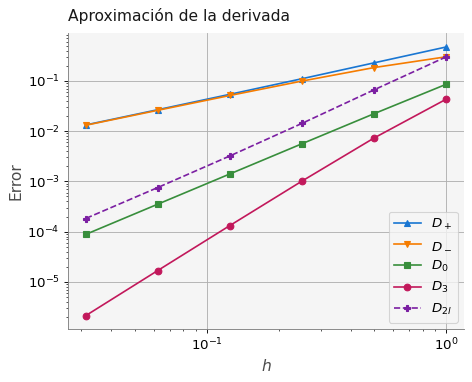

In [52]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h, e3, 'o-', label='$D_3$')
plt.plot(h, e2l, 'P--', label='$D_{2l}$')

plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.grid()
plt.show()

<div class="alert alert-success">

## Ejercicio 6. Aproximación con tres puntos (right).

<font color="Black">
Obtener los coeficientes $A$, $B$ y $C$ para una aproximación del siguiente tipo: 

$$
D_{2r} f^\prime = A f_i + B f_{i+1} + C f_{i+2}
$$

y luego implementar la fórmula y graficarla junto con los resultados anteriores.

</font>

</div>

In [46]:
# Implementación
def D2r(u,x,h):
    ### BEGIN SOLUTION
    return (-3*u(x) + 4*u(x+h) - u(x+2*h)) / (2*h)
    ### END SOLUTION

In [47]:
### BEGIN SOLUTION
# Calculamos el error entre la derivada exacta y la derivada numérica:
e2r = np.fabs( np.cos(x) - D2r(np.sin,x,h) )

file_answer.write('5', e2r, 'La implementación del error no es correcta, checa también los valores que estás comparando.')
file_answer.to_file('q3')
### END SOLUTION

print(e2r)

El directorio :/home/jovyan/macti_notes/notebooks/.ans/DerivadasNumericas/ ya existe
Respuestas y retroalimentación almacenadas.
[0.05447393 0.01596726 0.00775877 0.0023889  0.00065123 0.0001694 ]


In [48]:
quizz.eval_numeric('5', e2r)

----------------------------------------
5 | Tu resultado es correcto.
----------------------------------------


<div class="alert alert-success">

## Ejercicio 7.

<font color="Black">

Tomando como base los ejemplos de diferencias finitas anteriores, agrega una columna con 
los resultados del error de la aproximación de diferencias con **tres puntos-right** en el DataFrame `Error`.

</font>

</div>

In [49]:
# Colocamos la información de h y del error en un Dataframe y mostramos el resultado:
### BEGIN SOLUTION
Error['$D_{2r}$'] = e2r

### END SOLUTION
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$,$D_{2l}$,$D_{2r}$
0,1.00000,0.472476,0.301169,0.085654,0.043287,0.301169,0.054474
1,0.50000,0.228254,0.183789,0.022233,0.007314,0.066408,0.015967
2,0.25000,0.110248,0.099027,0.005611,0.001014,0.014265,0.007759
3,0.12500,0.053929,0.051118,0.001406,0.000132,0.003209,0.002389
4,0.06250,0.026639,0.025936,0.000352,0.000017,0.000754,0.000651
5,0.03125,0.013235,0.013059,0.000088,0.000002,0.000182,0.000169


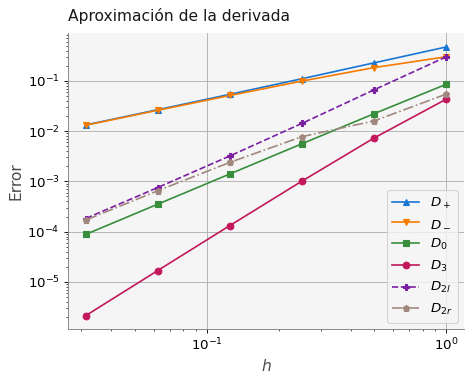

In [53]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h, e3, 'o-', label='$D_3$')
plt.plot(h, e2l, 'P--', label='$D_{2l}$')
plt.plot(h, e2r, 'p-.', label='$D_{2r}$')

plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.grid()
plt.show()